Add parent path to import things from there

In [4]:
import sys
import os
import random

parent_path = os.path.abspath('..')
sys.path.append(parent_path)

In [5]:
from src.datastore import store
from src import utils

import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [12]:
# generate a test dataframe for a given full month, having values for each weekday, ranging between 7.0 and 9.0 with one decimal
# df should have columns: day(index), work_time, pause, work
def gen_df_test():
    df2 = pd.DataFrame(
        {
            "day": pd.date_range(start='2021-01-01', periods=31).date,
            "work_time": [round(random.uniform(7.5, 9), 1) for _ in range(31)],
            "pause": [round(random.uniform(0, 0.6), 1) for _ in range(31)],
        }
    )
    df2["work"] = df2["work_time"] - df2["pause"]
    return df2

In [13]:
text_color = utils.get_font_color()
background_color = utils.get_background_color()

def set_plot_parameters():
    plt.rcParams["date.autoformatter.day"] = "%d"
    plt.rcParams["date.autoformatter.month"] = "%b"
    plt.rcParams["figure.facecolor"] = background_color
    plt.rcParams["axes.facecolor"] = background_color
    plt.rcParams["text.color"] = text_color
    plt.rcParams["axes.edgecolor"] = text_color
    plt.rcParams["xtick.color"] = text_color
    plt.rcParams["ytick.color"] = text_color
    plt.rcParams["axes.labelcolor"] = text_color
    plt.rcParams["axes.titlecolor"] = text_color
    # Despine the plot right and top
    plt.rcParams["axes.spines.right"] = False
    plt.rcParams["axes.spines.top"] = False
    plt.rcParams["font.family"] = "DejaVu Sans Mono"

set_plot_parameters()

In [16]:
0.975 * needed_hours

7.8

Text(0.5, 1.0, 'Working time for June 2024')

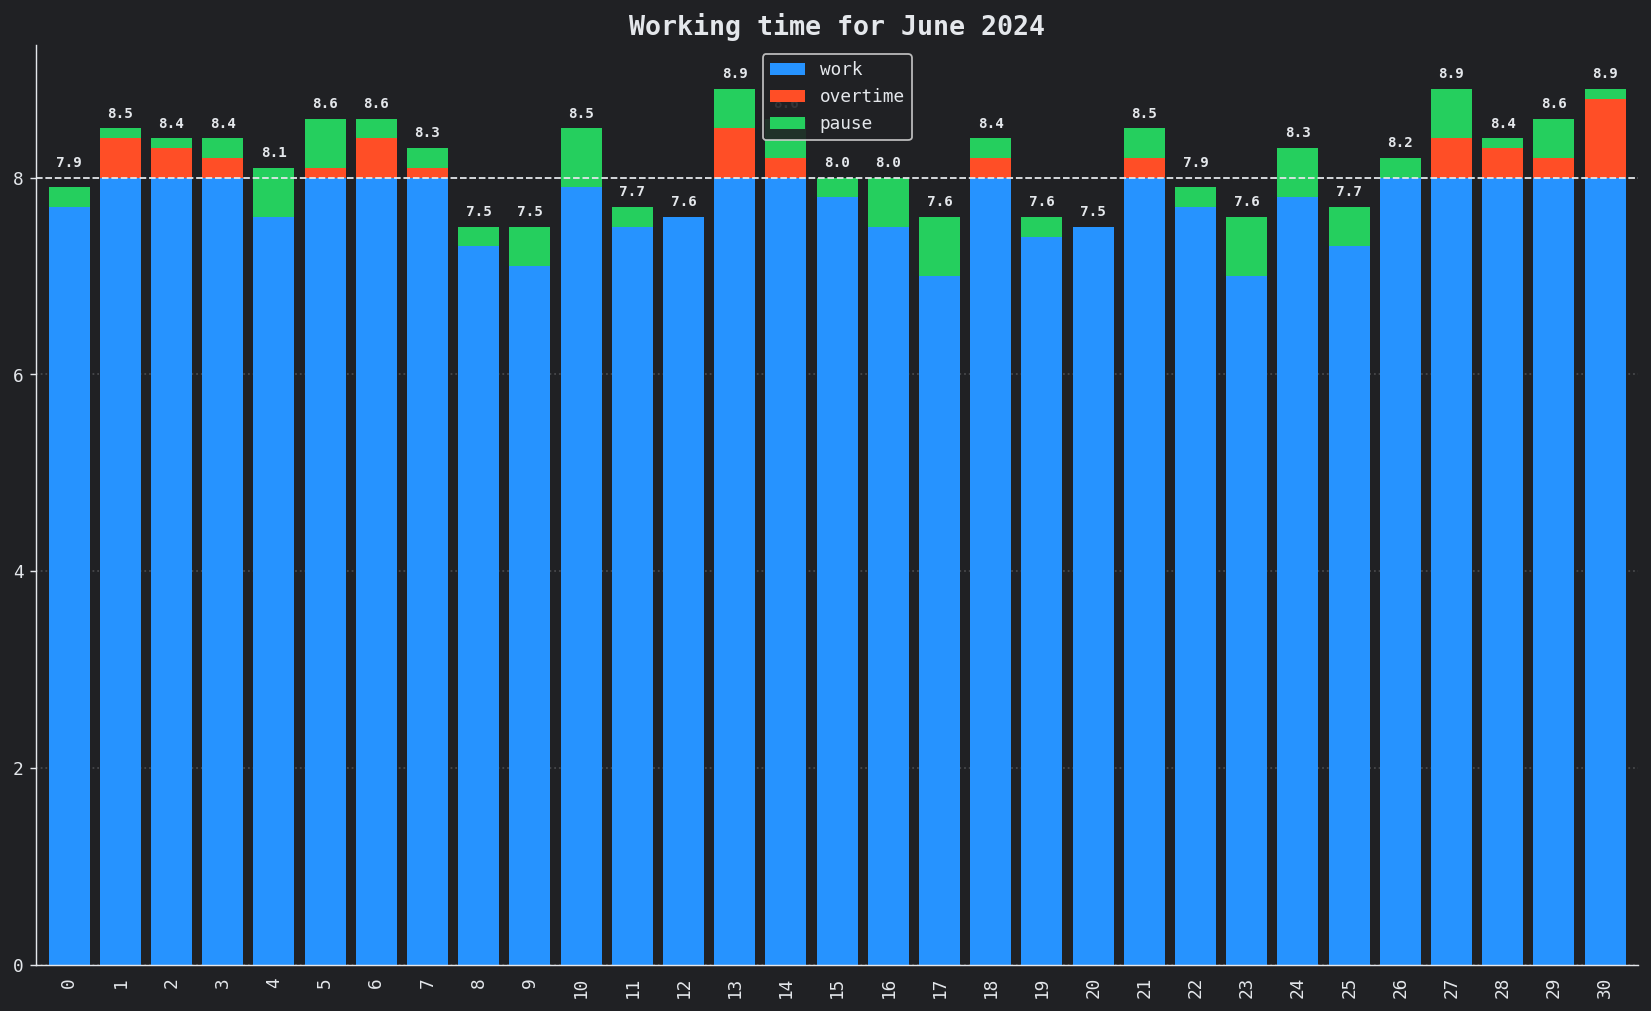

In [18]:
def adjust_df_for_plot(df: pd.DataFrame, needed_hours: float) -> pd.DataFrame:
    """Adjust the dataframe for plotting."""
    # check if df got pause column, else add it with 0
    if "pause" not in df.columns:
        df["pause"] = 0
    df["overtime"] = df["work"] - needed_hours
    df["overtime"] = df["overtime"].clip(lower=0)
    df["work"] = df["work"].clip(upper=needed_hours, lower=0)
    return df[["work", "overtime", "pause"]]


is_month = True
use_pause = True

# clears the old values and then adds a subplot to insert all the data
fig = plt.figure(figsize=(13, 8), dpi=128, tight_layout=True)
ax = fig.add_subplot(111)

needed_hours = 8
df2 = gen_df_test()
plot_df = adjust_df_for_plot(df2, needed_hours)
plot_df.plot.bar(stacked=True, ax=ax, width=0.8, color=["#2693ff", "#ff4e26", "#25cf5e"], zorder=2)

# Add numbers above the bars
for i, (_, row) in enumerate(plot_df.iterrows()):
    total_time = sum(row)
    if total_time <= 0.0:
        continue
    # put small offset for the numbers to not overlap with the bar
    # last 2.5% will collide with the line, in this case just put it above the line already
    line_collide = 0.97 * needed_hours <= total_time <= needed_hours
    position = (i, total_time + 0.01 * needed_hours)
    if line_collide:
        position = (i, 1.01 * needed_hours)
    ax.annotate(f"{total_time:.1f}", position, ha="center", va="bottom", fontsize=8, weight="bold")

ax.legend(fancybox=True, framealpha=0.9)
# hide the x ticks
ax.tick_params(axis="x", which="both", bottom=False, top=False)

ax.axhline(needed_hours, color=text_color, ls="--", lw=1, zorder=3)
ax.yaxis.grid(True, lw=1, ls=":", color=text_color, alpha=0.2, zorder=1)
ax.xaxis.get_label().set_visible(False)

if is_month:
    title = f"Working time for {store.current_date.strftime('%B %Y')}"
else:
    title = f"Working time for {store.current_date.year}"
ax.set_title(title, weight="bold", fontsize=15)